## Prophet works best with time series that have strong seasonal effects and several seasons of historical data. So, this notebook has simple implementation of prophet model in seasonal data.

In [49]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv("./milk_production.csv")
data.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [51]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [66]:
data.drop(168,axis=0,inplace=True)

In [75]:
data.tail()

,ds,y
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [6]:
data.Month=pd.to_datetime(data.Month)
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [76]:
data.dtypes

ds     object
y     float64
dtype: object

In [77]:
data.columns=['ds','y']
data.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


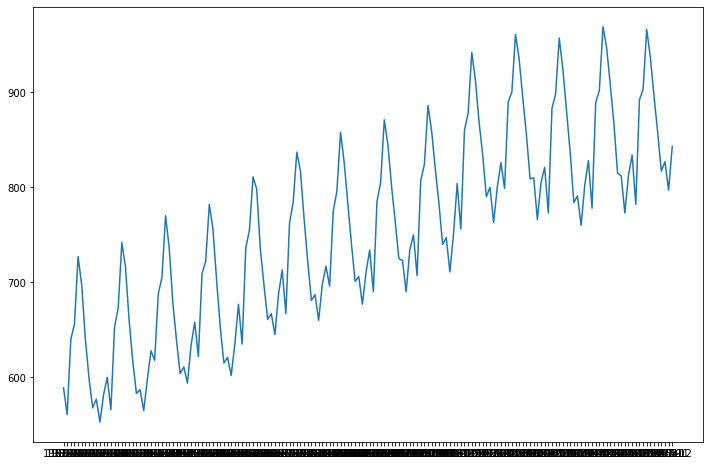

In [78]:
plt.figure(figsize=(12,8))
plt.plot(data.set_index(['ds']))

In [79]:
data.shape

(168, 2)

In [80]:
data_train,data_test=data.iloc[:100,:].copy(),data.iloc[100:,:]

In [81]:
data_train.shape,data_test.shape

((100, 2), (68, 2))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array befo

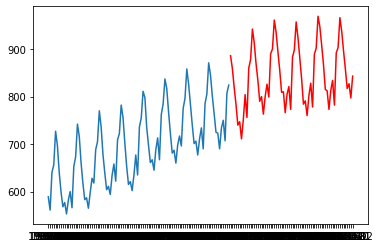

In [82]:
plt.plot(data_train['ds'], data_train['y'])
plt.plot(data_test['ds'], data_test['y'], 'r')
plt.show()

In [83]:
model=Prophet(daily_seasonality=True,
              weekly_seasonality=True,
              yearly_seasonality=True,
                interval_width=0.95
             ).add_seasonality(
               name='yearly',period=365.25,fourier_order=5
                )

In [84]:
model.fit(data_train)

In [88]:
future=model.make_future_dataframe(periods=68*2,freq='M') #test data count
forecast=model.predict(future)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases fo

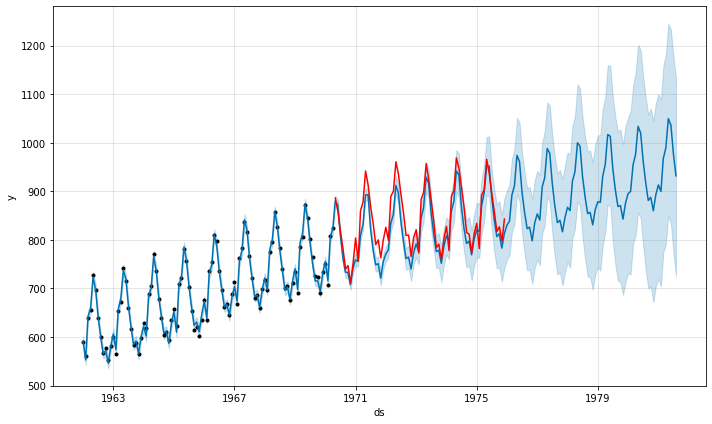

In [89]:
import seaborn as sns
fig=model.plot(forecast)
sns.lineplot(data=data_test, x=pd.to_datetime(data_test['ds']), y='y', c='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


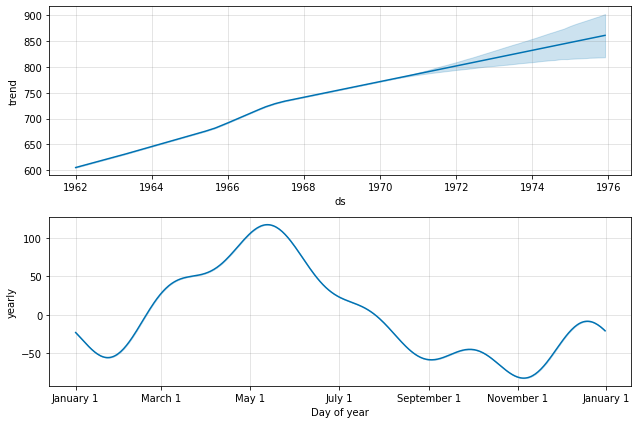

In [22]:
fig=model.plot_components(forecast)

# Forecast

In [23]:
model2=Prophet(daily_seasonality=False,
              weekly_seasonality=False,
              yearly_seasonality=False,
                interval_width=0.95
             ).add_seasonality(
               name='yearly',period=365.25,fourier_order=5
                )

In [24]:
model2.fit(data)

In [25]:
future=model2.make_future_dataframe(periods=365)
forecast=model2.predict(future)

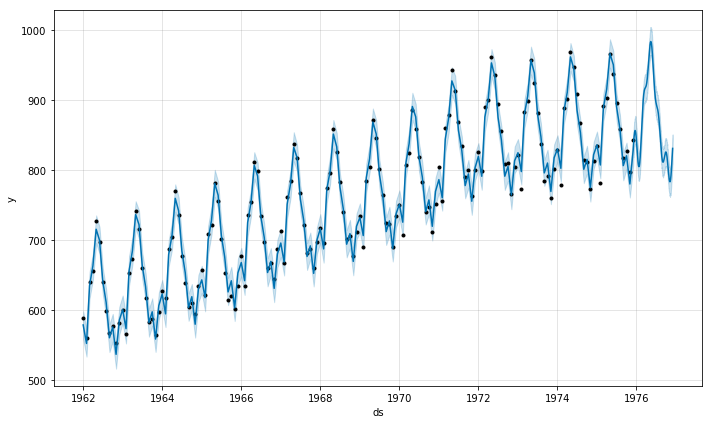

In [155]:
fig=model2.plot(forecast)